In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont("data/EDA_files/thsarabunnew-webfont.ttf")
mpl.rc('font', family="TH Sarabun New", size=10)

In [ ]:
ncd = pd.read_csv("data/EDA_files/ncd_screen.csv")
ncd.head()

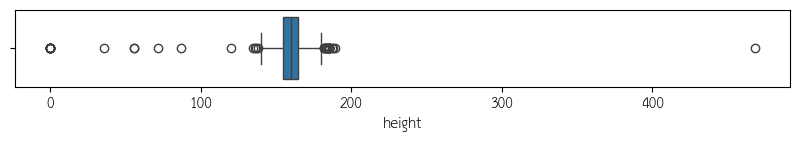

In [7]:
plt.figure(figsize=(10,1))
sns.boxplot(ncd, x = ncd['height'])
plt.show()

In [ ]:
ncd[(ncd['height'] < 100) | (ncd['height'] > 200)]

In [14]:
hosp = pd.DataFrame(ncd['hospcode'].unique()) 

In [15]:
ncd['bslevel_status'] = ncd['bslevel'].map(lambda s: '0' if s == 0 else '1' if 1 <= s < 100 else "2" if 100 <= s <= 125 else "3" if s >= 126 else '0' )

In [ ]:
ncd.head()

In [347]:
df_tab = pd.crosstab(ncd["hospcode"],ncd["bslevel_status"])
df_tab = df_tab.sort_values(by="2", ascending=[False]).head(5)
df = df_tab.reset_index().rename_axis(columns = None)
df

,hospcode,0,1,2,3
0,11018,1,672,100,53
1,11013,0,115,73,75
2,77764,4,167,61,12
3,13777,0,25,49,130
4,77745,1,93,35,23


In [379]:
cap = {
  "hospital" : df['hospcode'],
  "total" : df['2'] + df['3']
}
# cap = cap.sort_values('total', ascending=False)
cap = pd.DataFrame(cap)
cap = cap.sort_values('total', ascending=False)
cap

,hospital,total
3,13777,179
0,11018,153
1,11013,148
2,77764,73
4,77745,58


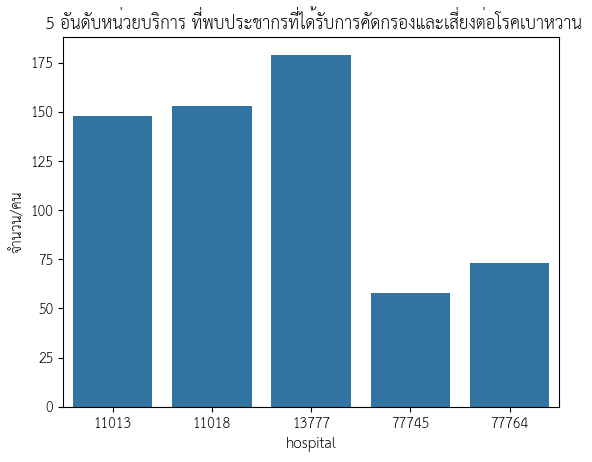

In [386]:
# เรียง ยังใช้ไม่ได้
fig, ax = plt.subplots(1,1)
# sns.barplot(data = cap,x=cap['hospital'], y=cap['total'], order=cap['total'])
sns.barplot(x='hospital', y='total', data=cap)
ax.set_title(" 5 อันดับหน่วยบริการ ที่พบประชากรที่ได้รับการคัดกรองและเสี่ยงต่อโรคเบาหวาน")
ax.set_ylabel("จำนวน/คน")
plt.show()

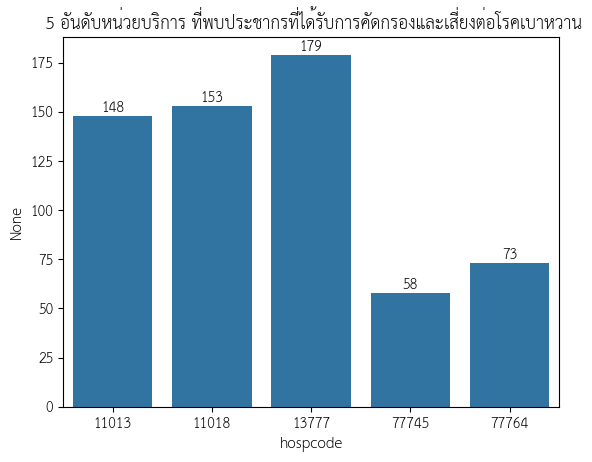

In [372]:
ax = sns.barplot(df, x=df['hospcode'], y=df['3'] + df['2'])
ax.bar_label(ax.containers[0])
ax.set_title(" 5 อันดับหน่วยบริการ ที่พบประชากรที่ได้รับการคัดกรองและเสี่ยงต่อโรคเบาหวาน")
plt.show()

In [219]:
sum_counts = df["1"] + df["2"] + df["3"]
bs_levels = {
  "ปกติ": df["1"] /sum_counts *100,
  "เสี่ยง" : df["2"] /sum_counts *100,
  "เป็นเบาหวาน" : df["3"] /sum_counts *100
}

In [217]:
hosp_group = df["index"]
hosp_group = hosp_group.astype('int64').astype('string')
hosp_group

0    13777
1    11013
2    11018
3    77690
4    25059
Name: index, dtype: string

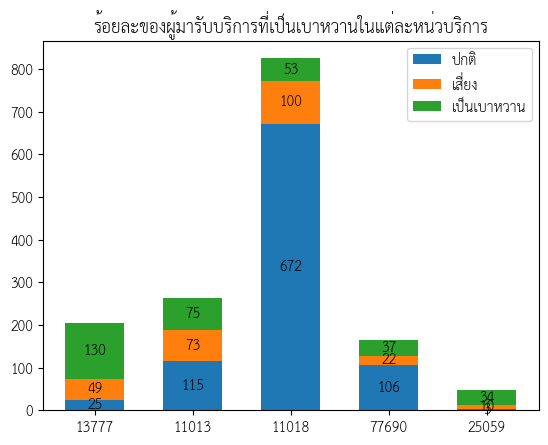

In [218]:
width = 0.6
fig, ax = plt.subplots()
bottom = np.zeros(len(hosp_group))

for status, bs_level in bs_levels.items():
  container = ax.bar(x=hosp_group, height =bs_level, width=width, label=status, bottom=bottom)
  bottom += bs_level
  ax.bar_label(container,label_type="center")
ax.set_title("ร้อยละของผู้มารับบริการที่เป็นเบาหวานในแต่ละหน่วบริการ")
ax.legend()

### ผู้ที่มีความเสี่ยง Hypertension (SBP ≥ 140 หรือ DBP ≥ 90)

In [263]:
def flag_df(ncd):
    
    if (ncd["sbp_1"] >= 140) | (ncd["dbp_1"] >= 90):
        return '1'
    else :
        return '0'
    
ncd['ht_status'] = ncd.apply(flag_df, axis = 1)

In [264]:
ncd.head()

,hospcode,pid,seq,ncd_screen_date_serv,servplace,smoke,alcohol,dmfamily,htfamily,weight,...,sbp_1,dbp_1,sbp_2,dbp_2,bslevel,bstest,screenplace,bslevel_status,ht_status,byear
0,11023,008765,3499362,12/2/2013,1,1.0,1.0,9.0,1.0,55.0,...,113,68,110.0,89.0,86.0,3.0,11023,1,0,2013
1,11024,017330,1841142,12/16/2015,1,1.0,1.0,2.0,2.0,46.0,...,120,60,120.0,60.0,130.0,3.0,11024,3,0,2015
2,12418,049945,705117,7/9/2020,1,1.0,1.0,2.0,2.0,52.0,...,110,59,110.0,60.0,88.0,3.0,12418,1,0,2020
3,12418,055877,693664,9/1/2020,1,1.0,1.0,2.0,2.0,50.0,...,100,65,100.0,60.0,85.0,3.0,12418,1,0,2020
4,12418,053288,705105,7/9/2020,1,1.0,1.0,2.0,2.0,56.0,...,110,63,110.0,63.0,85.0,3.0,12418,1,0,2020


In [265]:
ht_tab = pd.crosstab(ncd["byear"],ncd["ht_status"])
ht_tab = ht_tab.sort_values(by="byear", ascending=[True])
ht = ht_tab.reset_index().rename_axis(columns = None)
ht

,byear,0,1
0,2011,2,1
1,2012,291,36
2,2013,534,77
3,2014,414,34
4,2015,457,22
5,2016,571,61
6,2017,581,95
7,2018,520,74
8,2019,554,45
9,2020,799,73


In [266]:
ht['byear'] = ht['byear'].astype(str).astype(int)
ht['byear'] = ht['byear'] + 543

In [273]:
sum_counts = ht["0"] + ht["1"]
ht_levels = {
  "ปกติ": (ht["0"] / sum_counts *100).round(2),
  "เสี่ยง" : (ht["1"] / sum_counts *100).round(2),
}
ht_levels

{'ปกติ': 0     66.67
 1     88.99
 2     87.40
 3     92.41
 4     95.41
 5     90.35
 6     85.95
 7     87.54
 8     92.49
 9     91.63
 10    82.46
 11    84.19
 12    72.73
 dtype: float64,
 'เสี่ยง': 0     33.33
 1     11.01
 2     12.60
 3      7.59
 4      4.59
 5      9.65
 6     14.05
 7     12.46
 8      7.51
 9      8.37
 10    17.54
 11    15.81
 12    27.27
 dtype: float64}

In [274]:
year_group = ht["byear"]
year_group = year_group.astype('int64').astype('string')
year_group

0     2554
1     2555
2     2556
3     2557
4     2558
5     2559
6     2560
7     2561
8     2562
9     2563
10    2564
11    2565
12    2566
Name: byear, dtype: string

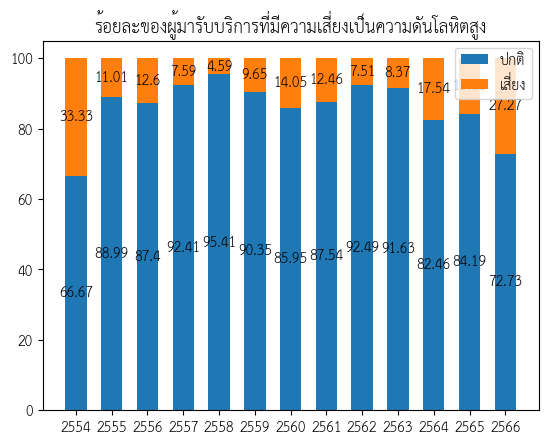

In [280]:
width = 0.6
fig, ax = plt.subplots()
bottom = np.zeros(len(year_group))

for status, ht_level in ht_levels.items():
  container = ax.bar(x=year_group, height =ht_level, width=width, label=status, bottom=bottom)
  bottom += ht_level
  ax.bar_label(container,label_type="center")
ax.set_title("ร้อยละของผู้มารับบริการที่มีความเสี่ยงเป็นความดันโลหิตสูง")

# colors = {'ปกติ':'blue', 'เสี่ยง':'yellow'}         
# labels = list(colors.keys())
# handles = [plt.Rectangle((0,0),2,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels)
ax.legend()
plt.show()

### ร้อยละการสูบบุหรี่ของคนที่คัดกรอง NCD

In [314]:
def flag_smoke(ncd):
    
    if (ncd["smoke"] == 2) | (ncd["smoke"] == 3) | (ncd["smoke"] == 4) :
        return '1'
    elif ncd["smoke"] == 1 :
      return '0'
    else :
        return '9'
    
ncd['smoke_status'] = ncd.apply(flag_smoke, axis = 1)

In [328]:
smoke_tab = pd.crosstab(ncd["smoke_status"],ncd["smoke_status"])
smoke_tab = smoke_tab.sort_values(by="smoke_status", ascending=[True])
smokes = smoke_tab.reset_index().rename_axis(columns = None)
smokes

,smoke_status,0,1,9
0,0,5520,0,0
1,1,0,242,0
2,9,0,0,836


In [335]:
smoke_group = smokes["smoke_status"]
smoke_group = smoke_group.map(lambda s: 'ไม่สูบบุหรี่' if s == '0' else 'สูบบุหรี่' if  s == '1' else "ไม่มีข้อมูล")
sum_counts = smokes["0"] + smokes["1"] + smokes["9"] 
smoke_group

0    ไม่สูบบุหรี่
1       สูบบุหรี่
2     ไม่มีข้อมูล
Name: smoke_status, dtype: object

In [336]:
colors = sns.color_palette('pastel')[0:5]

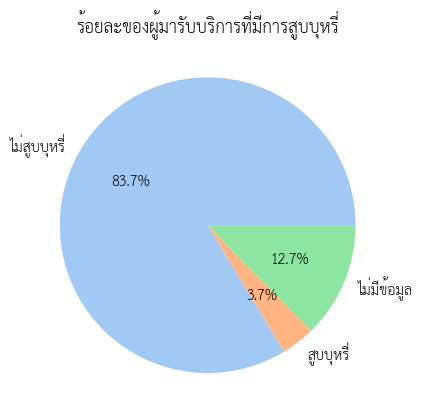

In [339]:
fig, ax = plt.subplots()
plt.pie(sum_counts, labels = smoke_group, autopct ="%.1f%%", colors = colors)
ax.set_title("ร้อยละของผู้มารับบริการที่มีการสูบบุหรี่")
plt.show()